In [1]:
#!/usr/bin/python3

##############################
#          IMPORTS
##############################
from wordcloud_fa import WordCloudFa
from numpy import array as np_array
from PIL import Image as PIL_Image
from clipboard import paste
from os.path import exists as path_exists
from os import makedirs
from matplotlib import pyplot as plt
######################################
#             CONFIGS
######################################
MASK = "./mask.png"

FONT = "../assets/fonts/font2.ttf"
FONT = "../assets/fonts/shabnam/Shabnam.ttf"

OUT_FOLDER = "out/"

BG_COLOR = "black"

###############
#if you have unfollow cheker
# or some thing that post automatically tweet with link
# turn on this option to remove all tweets with links (and links and quets)
###########
NO_LINK = False

###############
# to create cloud based on tweets
# and not replies
# set above boolean to True
# use with cautopn
####################
NO_REPLIES = True

#############
#this option is for ignoring retweets
#because in default we want to create cloud only based on user tweets
#not retweets
##############
NO_RETWEET = True

STOP_WRODS_LIST =[
    "./stopwords_me.txt",
    "./origianl_stop_words.txt",
    "./addtional_stops.txt",
]


#########################################
#              the CODE
#########################################

def load_stop_words():
    """
    load stop words and return them as a set
    it load from 3 files that wrote in STOP_WORDS_LIST
    """
    words = []
    for file_add in STOP_WRODS_LIST:
        with open(file_add,"r") as file:
            new_words = file.read().split()
            words+= new_words
    return set(words)

def clean_word(d):
    """
        remove some bad words from input
        for example twitter links
        or remove nim fasele
        or ...
    """
    d.replace("\u200c","")
    if "t.co" in d : return ""
    if len(d) <3: return ""
    if "-" in d : return ""

    if " می" in d  or "شه" in d  : return ""
    if "بیش" in d  : return ""
    if "می" in d : return ""
    if d == "ست" : return ""
    if "خیلی" in d : return ""
    if "ولی" in d : return ""

    return d

def extract_text(line):
    """
        get a line of input
        and remove junk file of it
        and clean each word ant etc..
    """
    words = line.strip().split(" ")

    if NO_LINK and "t.co" in line: return "" # linkdar ha ro hazf kon

    while words[0].startswith("@"): # mention ha ro hazf kon
        if NO_REPLIES : return "" # kolan bikhial in tweet besho
        words = words[1:]

    if NO_RETWEET and words[0] == "RT" : return "" # retwetts ha ro hazf kon

    words = words[:-3] # remove date and time

    words_cleaned = [ clean_word(t) for t in words ]
    return " ".join(words_cleaned)


def get_raw_str():
    """
        get input from input source
        either clipboard or the input file
    """
    file_name = input("enter tweets filename: ")
    if file_name.strip() == "" :
        print("using clipboard as source")
        return paste()
    else:
        with open(file_name, "r") as input_file:
            return input_file.read()

def print_stats(text):
    """
    show some statistics
    to make sure that the program opened correct input file
    """
    print( f" len e kol : {len(text)}")
    print (f"""spaces count : { text.count(" ") }""" )


def make_dir(dir):
    """
    make the output directory if it isnt there!
    """
    if not path_exists(dir):
        makedirs(dir)
        print(f"Created {dir} directory")



In [12]:
raw_str = get_raw_str()
raw_list = raw_str.split("\n")
try:
    user_id = raw_list[3].replace("@","").strip()
except IndexError:
    print("bad input! please copy whole page")
    exit()

print(f"working on @{user_id}\n")


enter tweets filename:  luna.txt


working on @tahacodes اونطوری مغزت خراب میشه Oct 28, 2020



In [13]:
raw_tweets_list = raw_list[10:-6] # remove up and down header footer
text_list = [ extract_text(t) for t in raw_tweets_list ]
text = " ".join(text_list)


In [14]:
text[0:20]

'      امشب قراره  پل'

In [15]:
import numpy as np
from PIL import Image

mask_array = np.array(Image.open("mask.png"))

In [16]:


wc= WordCloudFa(
    width=900, height=900,
    background_color=BG_COLOR,
    mask = mask_array,
    persian_normalize=True,
    include_numbers=False,
)


In [17]:
def load_stop_words(stop_word_files):

    words = []
    for file_add in stop_word_files:
        with open(file_add,"r") as file:
            new_words = file.read().split()
            words+= new_words
    return set(words)


In [30]:
STOP_WORD_FILES=['./addtional_stops.txt','./origianl_stop_words.txt','./stopwords_me.txt']
stop_word=load_stop_words(STOP_WORD_FILES)
wc.add_stop_words(stop_word)

In [31]:
word_cloud=wc.generate(text)

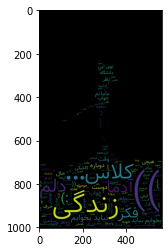

In [32]:
word_image = word_cloud.to_image()

plt.imshow(word_image)
plt.show()


In [21]:

make_dir(OUT_FOLDER)
word_image.save("wordimg.png")



